<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обоснование</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

***Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а так же чтобы качество моделей машинного обучения не ухудшилось. Обоснуем корректность его работы.***

**ОПИСАНИЕ ДАННЫХ**

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

**ПЛАН РАБОТЫ**

1. Загрузить и изучить данные.
2. Ответить на вопрос и обосновать решение: "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?"
    - a. Изменится
    - b. Не изменится    
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверьть, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Загрузка и подготовка данных 

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузим таблицу, выведем первые 5 строк и краткую информацию

In [2]:
try:
    my_df = pd.read_csv('/datasets/insurance.csv')
except:
    my_df = pd.read_csv(r'C:\Users\Admiral\Desktop\учеба\практикум\Проекты\Datasets\09_insurance.csv')

display(my_df.head())
my_df.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


На первый взгляд все в порядке, но для удобства лучше перевести наименования столбцов на англ. язык, а так же столбец с возрастом перевести в целочисленный тип данных. Пропуски отсутствуют.

In [3]:
my_df.columns = ['gender', 'age', 'salary', 'relatives', 'insurance_pay']

Выведем основные статистические показатели

In [4]:
display(my_df.describe())

,gender,age,salary,relatives,insurance_pay
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


На первый взгляд аномалии отсутствуют. Изменим тип данных во всех колонках кроме зарплаты на uit8

In [5]:
my_df[['gender', 'age', 'insurance_pay', 'relatives']] = my_df[['gender', 'age',\
                                                                'insurance_pay',\
                                                                'relatives']].astype('uint8')

Проверим наличие дубликатов

In [6]:
display(my_df.duplicated().sum())

153

Из 5000 наблюдений 153 являются дубликатами. Но в данных отсутствуют фамилия, имя клиента или id, поэтому мы не можем утвержать что это дубликаты, вероятно это просто совпадения

Изучим корреляцию между признаками

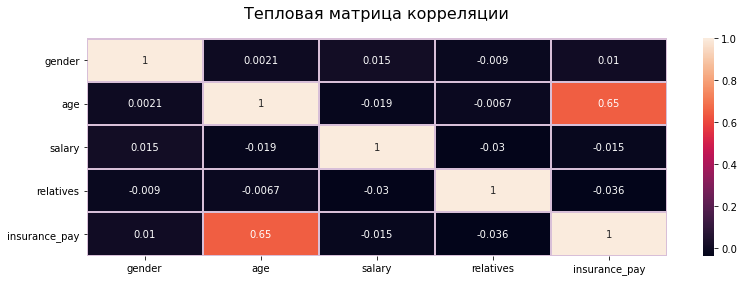

In [7]:
plt.figure(figsize=(13, 4))
my_heatmap = sns.heatmap(my_df.corr(), annot=True, linewidths=1.1, linecolor='thistle')
my_heatmap.set_yticklabels(my_heatmap.get_yticklabels(), rotation=0)
plt.title('Тепловая матрица корреляции', pad='20', fontsize=16)
plt.show()

Корреляция, выше средней, присутствует только между целевым признаком и возрастом

Рассмотрим распределения признаков

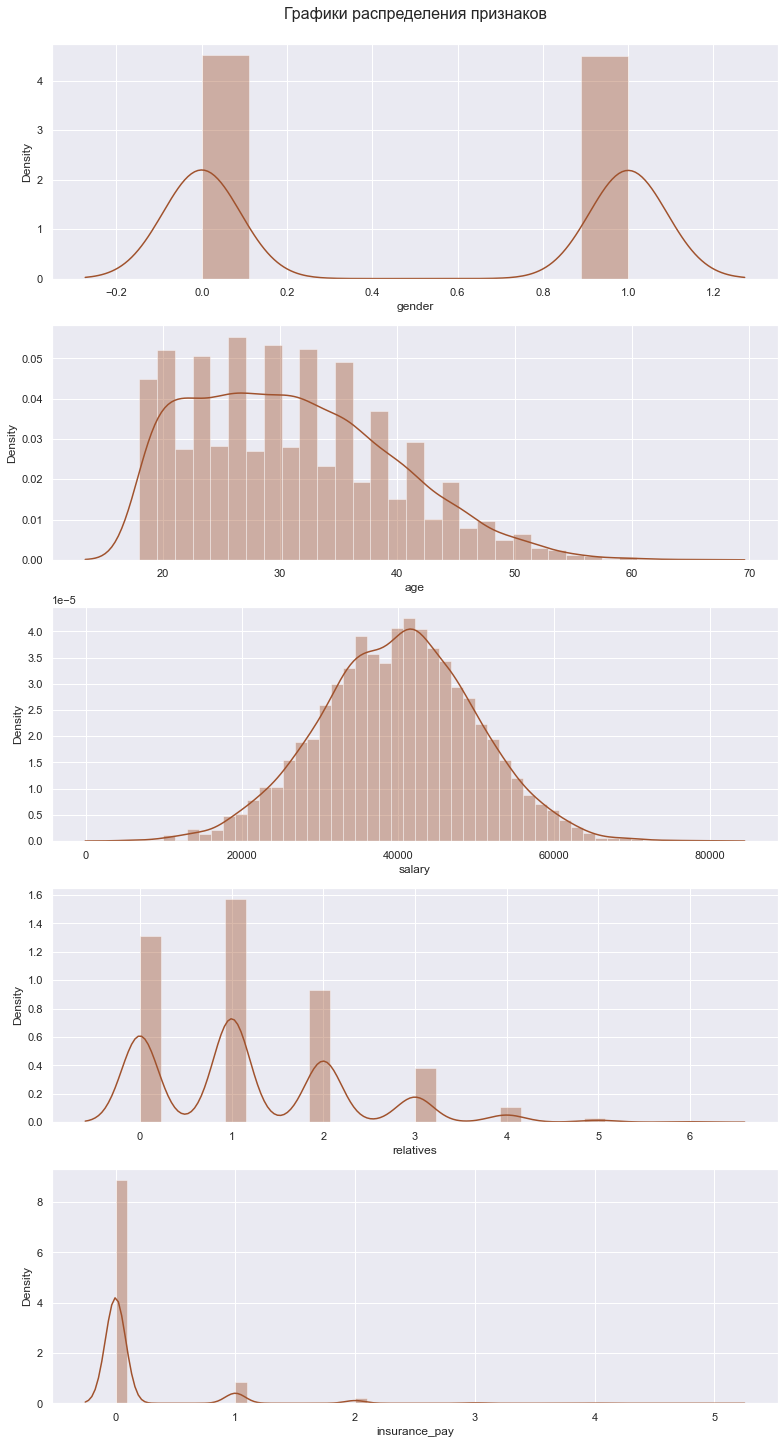

In [8]:
sns.set(style='darkgrid')
tup = ()
fig,tup = plt.subplots(5,1, figsize=(13,25))

for i in range(len(my_df.columns)):
    sns.distplot(my_df.iloc[:, i], ax=tup[i], color='sienna')

plt.title('Графики распределения признаков', pad='1150', fontsize=16)
plt.show()

В таблице имеется одинаковое количество данных о клиентах мужского и женсого пола, в основном клиенты возрастом от 18 до 40 лет, зарплата имеет нормальное распределение, клиенты по большей части имеют от 0 до 3 родственников. Что касаемо целевого признака мы наблюдаем серьезный дисбаланс. Подавляющее большинство наблюдений имеет 0 по количеству страховых выплат.

## Умножение матриц

В данном разделе мы проверим, изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу. Для этого мы используем некоторые матричные теоремы для преобразования формул и последующего сравнения предсказания на обычных признаках и зашифрованных.

Введем обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $a$ — вектор предсказаний

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ — единичная матрица

Формула предсказания:

$$
a = Xw
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$


**Необходимые теоремы:**

1. Ассоциативный закон умножения

$$A B C = A ( B C ) = ( A B ) C $$

2. Правила транспонирования

    2.1
$$(А^T)^T = А$$
    2.2
$$( A B)^T = B^T A^T$$
    2.3
$$( A B C)^T = C^T B ^T A^T$$

3. Правила обратимых матриц

    3.1$$AE = EA = A$$
    3.2$$АА^{-1} = А^{-1} А = E$$
    3.3$$(А^{-1} )^{-1} = А$$
    3.4$$(AB)^{-1} = B^{-1} A^{-1}$$
    3.5$$(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$$
    3.6$$(А^T)^{-1} = (А^{-1} )^T$$


    

Для начала, используя теоремы, попробуем преобразовать формулу обучения:
$$w = (X^T X)^{-1} X^T y$$
Раскроем скобки, применив правило №3.4:
$$w = X^{-1} (X^T)^{-1} X^T y$$
Видим, что используя правило №3.2, мы можем произвести сокращение. Тогда останется:
$$w = X^{-1} E y$$
что, согласно правилу №3.1 эквивалентно:
$$w = X^{-1} y$$
Дальше преобразовывать некуда. Теперь проделаем ту же операцию с матрицей умноженной на обратимую матрицу. Конечно можно подставить значение полученной матрицы в уже преобразованную формулу, но ради интереса пройдем весь путь с начала. Начальная формула обучения теперь будет выглядеть так:
$$w^{'} = ((XP)^T XP)^{-1} (XP)^T y$$
Раскроем левые внешнии скобки, используя правило №3.5:
$$w^{'} = P^{-1} X^{-1} ((XP)^T)^{-1} (XP)^T y$$
Видим, что используя правило №3.2, мы можем произвести сокращение. Тогда останется:
$$w^{'} = P^{-1} X^{-1} E y$$
что, согласно правилу №3.1 эквивалентно:
$$w^{'} = P^{-1} X^{-1} y$$
Подставив в правую часть выражения *w* вместо:
$$X^{-1} y$$
выведем связь между параметрами линейной регрессии в исходной задаче и в преобразованной:
$$w^{'} = P^{-1} w$$
Умножим обе части уравнения на P слева:
$$P w^{'} = P P^{-1} w$$
Используем правило №3.2:
$$P w^{'} = E w$$
что эквивалентно:
$$w = P w^{'}$$


У нас имеется два вектора весов:
$$w = X^{-1} y$$
$$w^{'} = P^{-1} X^{-1} y$$
Подставим их в формулу предсказания:
$$a = X X^{-1} y$$
$$a^{'} = X P P^{-1} X^{-1} y$$
Используя правило 3.2 проведем поочередно преобразование:
$$a = X X^{-1} y$$
$$a = E y$$
$$a = y$$
и:
$$a^{'} = X P P^{-1} X^{-1} y$$
$$a^{'} = X E X^{-1} y$$
$$a^{'} = X X^{-1} y$$
$$a^{'} = E y$$
$$a^{'} = y$$

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии не изменится

**Обоснование:** Умножение признаков на обратимую матрицу никак не влияет на итоговые предсказания, оно лишь изменяет веса признаков, так как:
$$a^{'} = a$$
но:
$$w^{'} = P^{-1} w$$

## Алгоритм преобразования

### Алгоритм

1. Напишем функцию, которая сгенирирует нам случайную матрицу при помощи метода np.random.randint размером 4х4 (так как размер нашей матрицы с наблюдениями и признаками 5000х4) и проверит ее на обратимость при помощи проверки наличия/отсутствия ошибки на функции np.linalg.inv() по сгенерированной матрице. Если матрица пройдет проверку - функция вернет нам ее, если не пройдет - функция вызовет сама себя и сгенерирует новую матрицу.
2. Разделим данные на признаки и целевой признак
3. Умножим нашу матрицу с признаками на полученную обратимую матрицу. Получившуюся матрицу сохраним в отдельной переменной
4. При помощи функции train_test_split из библиотеки sklearn.model_selection разделим все данные на обучающую и тестовую выборки
5. Проведем обучение и тестирование модели на основе алгоритма Линейной регрессии

### Обоснование

Разделим данные на признаки и целевой признак

In [9]:
X = my_df.drop('insurance_pay', axis=1)
y = my_df.insurance_pay

Сохраним в отдельной переменной копию признаков, которые в дальнейшем будем преобразовывать путем умножения на обратимую матрицу

In [10]:
X_converted = X.copy()

Напишем функцию, которая гарантированно вернет нам обратимую матрицу

In [11]:
def reversible(n, m):
    matrix = np.random.randint(-200, 200, size=(n,m))
    try:
        np.linalg.inv(matrix)
        return matrix
    except:
        reversible(n,m)

Сохраним в отдельную переменную случайную обратимую матрицу

In [12]:
my_matrix = reversible(4,4)
display(my_matrix)

array([[ 154, -106, -141,  170],
       [ 175,  134,   26,  182],
       [ 175,   35,  -72,  100],
       [ 165,  187, -182,  177]])

Преобразуем матрицу путем умножения на обратимую матрицу

In [13]:
X_converted = X_converted @ my_matrix

Подставим в формулу наши матрицы и посчитаем вектор весов по обычным признакам и по преобразованным:
$$w = (X^T X)^{-1} X^T y$$

In [14]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w_converted = np.linalg.inv(X_converted.T @ X_converted) @ X_converted.T @ y

Расчитаем предсказания на обычной и преобразованной матрицах по формуле:
$$a = Xw$$

In [15]:
a = X.values @ w
a_converted = X_converted.values @ w_converted

Проверим на сколько максимум рознятся предсказания на обычной и преобразованной матрицах

In [16]:
print(f'Максимальная ошибка: {abs(a - a_converted).max():.8f}')

Максимальная ошибка: 0.00000016


Максимальная ошибка незначительна, подобные ошибки можно не учитывать. Расчет показал что вектора предсказаний "а" и "a_converted" не имеют значимых различий. Приступим к практической проверке алгоритма.

## Проверка алгоритма

Напишем функцию которая на вход получит признаки и целевой признак, разделит данные на обучающую и тестовую выборки, обучит модель линейной регрессии на обучающей выборке, сделает предсказания на тестовой и выведет значение метрики R2

In [17]:
def my_LinReg(my_X, my_y, status):
    X_t, X_v, y_t, y_v = train_test_split(my_X, my_y, test_size=.25, random_state=99)
    model = LinearRegression()
    model.fit(X_t, y_t)
    pred = model.predict(X_v)
    print(f'Метрика R2 {status} преобразования матрицы признаков: {r2_score(y_v, pred):.16f}')

Используя функцию, расчитаем метрику R2 на обычных и зашифрованных признаках

In [18]:
my_LinReg(X, y, ' до  ')
my_LinReg(X_converted, y, 'после')

Метрика R2  до   преобразования матрицы признаков: 0.4458052004598034
Метрика R2 после преобразования матрицы признаков: 0.4458052004598008


Можно с уверенностью заключить, что умножение матрицы признаков на обратимую матрицу никак не влияет на качество предсказаний модели.

## Вывод

Во время подготовки проекта были выполнены следующие шаги и сделаны следующие выводы:

- Загрузили и изучили данные. Провели легкую предобработку данных. Изучили корреляцию между признаками и графики распределения признаков.
- Математически доказали, что умножение матрицы признаков на любую обратимую матрицу никак не влияет на итоговые предсказания, но изменяет вектор весов для признаков.
- Расписали алгоритм шифрования данных, а так же математически подтвердили на основе нашего алгоритма шифрования уже на реальных данных, что умножение матрицы признаков на любую обратимую матрицу никак не влияет на итоговые предсказания.
- Проверили, что качество линейной регрессии из sklearn не отличается до и после преобразования методом сравнения метрик R2